In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#get csv files
#out: merged_df.to_csv("../data/4min_pass_wave_salt_temp.csv", index=True)

data_location_01 = "../data/trench_dive_temperature.csv"
data_location_02 = "../data/trench_dive_salinity.csv"
data_location_03 = "../data/trench_dive_current_U.csv"
data_location_04 = "../data/trench_dive_current_V.csv"
data_location_05 = "../data/trench_dive_current_W.csv"
data_location_06 = "../data/buoy_7200.csv"
data_location_07 = "../data/seismic_7200.csv"

df_temp = pd.read_csv(data_location_01)
df_salinity = pd.read_csv(data_location_02)
df_U = pd.read_csv(data_location_03)
df_V = pd.read_csv(data_location_04)
df_W = pd.read_csv(data_location_05)
df_buoy = pd.read_csv(data_location_06)
df_seismic = pd.read_csv(data_location_07)


In [16]:
# Function for min-max normalization per column
def min_max_normalize_column(df):
    return df.apply(lambda col: (col - col.min()) / (col.max() - col.min()), axis=0)

# Load the CSV files into DataFrames
df_temp = pd.read_csv(data_location_01)
df_salinity = pd.read_csv(data_location_02)
df_U = pd.read_csv(data_location_03)
df_V = pd.read_csv(data_location_04)
df_W = pd.read_csv(data_location_05)

#get pressure
# Constants
rho = 1025  # kg/m³, density of seawater
g = 9.81  # m/s², gravitational acceleration
P0 = 101325  # Pa, atmospheric pressure at sea level

# Calculate pressure in Pascals using the absolute value of the depth
df_temp['Pressure'] = P0 + rho * g * abs(df_temp['depth'])

# List of the original DataFrames
dfs = [df_temp, df_salinity, df_U, df_V, df_W]

# Process each DataFrame
new_dfs = []
for df in dfs:
    # Normalize each column in the DataFrame using min-max normalization
    normalized_df = min_max_normalize_column(df)
    
    # Create a new DataFrame with 7200 rows, filled with 0.0, and same number of columns as the original DataFrame
    new_df = pd.DataFrame(0.0, index=range(7200), columns=df.columns)
    
    # Insert the normalized data starting from index 1800
    new_df.iloc[1800:1800 + len(normalized_df), :] = normalized_df.values
    
    # Append the new DataFrame to the list
    new_dfs.append(new_df)

# Unpack the new DataFrames into respective variables
new_df_temp, new_df_salinity, new_df_U, new_df_V, new_df_W = new_dfs

In [17]:
new_df_temp.head()

,Unnamed: 0,depth,temperature,Pressure
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_11436/3022958768.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(df_temp.columns))  # Using 'tab10' colormap (or any other colormap)


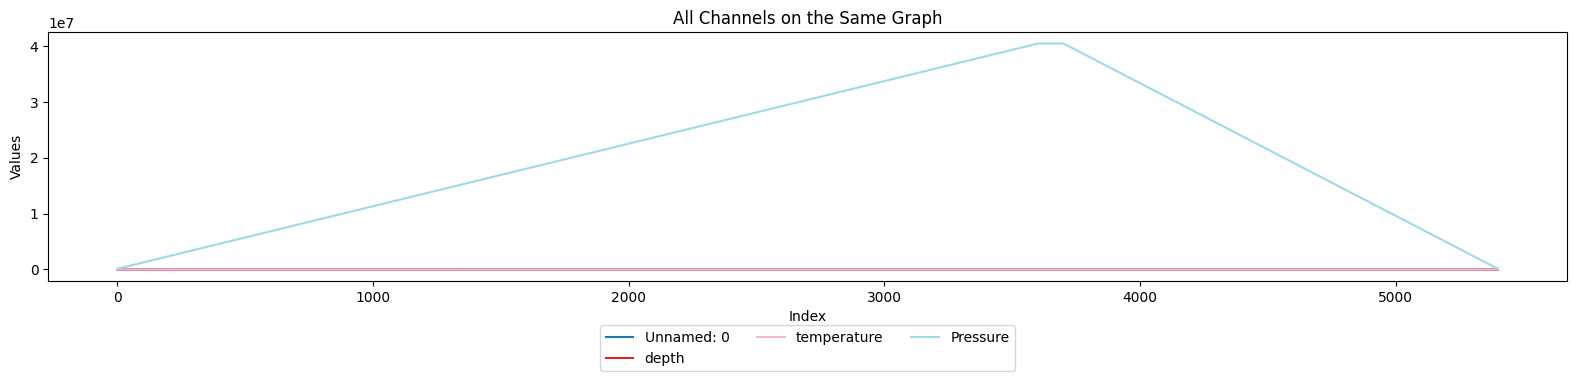

In [20]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(df_temp.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(df_temp.columns):
    ax1.plot(df_temp.index, df_temp[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Add a combined legend for all columns and place it below the plot
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(normalized_df.columns))

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
#plt.savefig("../img/dive.png")

# Display the plot
plt.show()

In [6]:
new_df_salinity.head()

,Unnamed: 0,depth,salinity
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [7]:
df_buoy.head()

,Unnamed: 0,WDIR,WSPD,GST,WVHT,APD,ATMP,WTMP,Timestamp,sun_exposure,sun_exposure_shift,sun_exposure_modified
0,0,0.257143,0.636364,0.571429,0.533333,0.369565,0.732143,0.066667,0.000000,0.0,NaN,0.0
1,1,0.228571,0.636364,0.500000,0.533333,0.369565,0.750000,0.066667,0.000553,0.0,0.0,0.0
2,2,0.228571,0.636364,0.500000,0.500000,0.358696,0.732143,0.066667,0.001107,0.0,0.0,0.0
3,3,0.257143,0.636364,0.571429,0.466667,0.347826,0.750000,0.066667,0.001660,0.0,0.0,0.0
4,4,0.257143,0.727273,0.571429,0.466667,0.347826,0.750000,0.066667,0.002214,0.0,0.0,0.0


In [8]:
col1 = new_df_temp['depth']  # normalize
col2 = new_df_temp['Pressure']  # normalize
col3 = new_df_temp['temperature']  # normalize
col4 = new_df_salinity['salinity'] # normalize
col5 = new_df_U['current'] 
col6 = new_df_V['current']
col7 = new_df_W['current']

col8 = df_buoy['WVHT'] 
col9 = df_buoy['ATMP'] 
col10 = df_buoy['WSPD'] 
col11 = df_seismic[' Sample'] #note space
col12 = df_buoy['sun_exposure_modified']*df_buoy['WSPD']

merged_df = pd.DataFrame({'depth': col1, 'pressure': col2, 'temperature': col3, 'salinity': col4, 'U_current':col5, 'V_current':col6, 'W_current':col7, 'glitter':col12})
normalized_df = merged_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#add buoy, already normalized
normalized_df["buoy_height"] = col8
normalized_df["buoy_temp"] = col9 
normalized_df["buoy_windspeed"] = col10
#add Seismic, already normalized
normalized_df["seismic"] = col11

normalized_df.fillna(0.0, inplace=True)

In [9]:
normalized_df.tail()

,depth,pressure,temperature,salinity,U_current,V_current,W_current,glitter,buoy_height,buoy_temp,buoy_windspeed,seismic
7195,0.997644,0.002356,1.000000,0.836957,0.273654,0.996517,0.991644,0.0,0.573333,0.892857,0.181818,0.0
7196,0.998233,0.001767,0.999984,0.837035,0.245524,1.000000,0.993673,0.0,0.586667,0.875000,0.181818,0.0
7197,0.998822,0.001178,0.999933,0.837123,0.208549,0.992155,0.995756,0.0,0.600000,0.857143,0.181818,0.0
7198,0.999411,0.000589,0.999837,0.837237,0.154359,0.968889,0.997863,0.0,0.600000,0.875000,0.181818,0.0
7199,1.000000,0.000000,0.999427,0.837537,0.000000,0.867684,1.000000,0.0,0.000000,0.000000,0.000000,0.0


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_11436/1659287356.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(normalized_df.columns))  # Using 'tab10' colormap (or any other colormap)


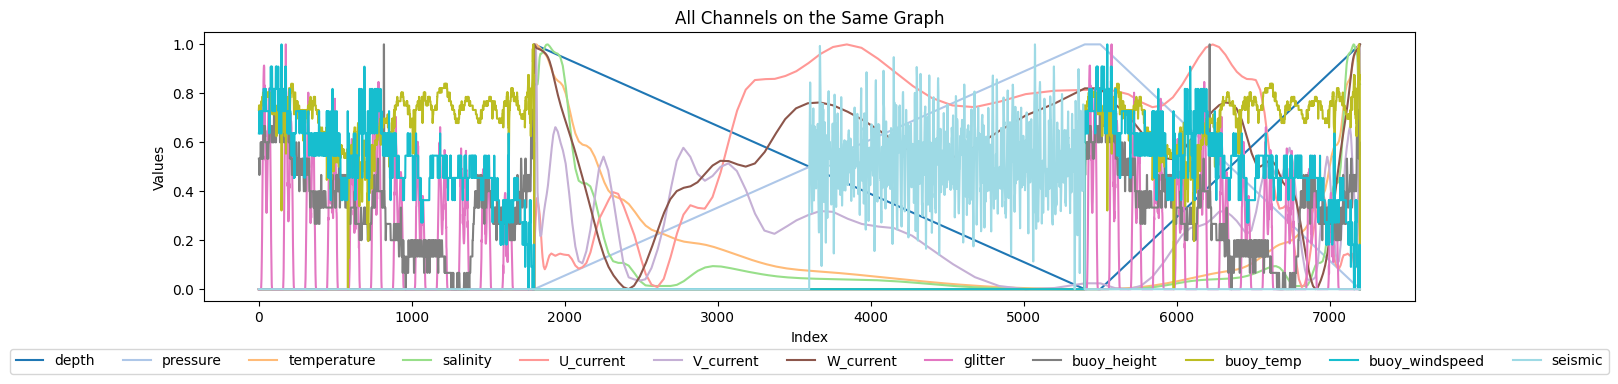

In [13]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(normalized_df.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(normalized_df.columns):
    ax1.plot(normalized_df.index, normalized_df[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Add a combined legend for all columns and place it below the plot
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(normalized_df.columns))

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig("../img/dive.png")

# Display the plot
plt.show()


In [42]:
# normalized_df[df_clouds.columns] = df_clouds
# normalized_df.head()

In [43]:
# normalized_df = normalized_df.drop(columns=['Unnamed: 0'])
# normalized_df.head()

In [48]:
normalized_df.to_csv("../data/12min_pass_v06.csv", index=True)